# 1. Analyse des données socio-économiques

In [2]:
# 1)
from gapminder import gapminder as gp
import pandas as pd
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

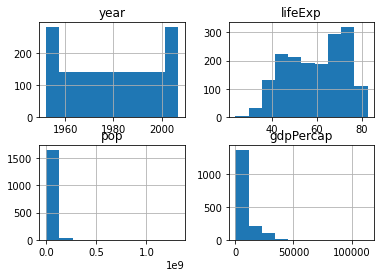

In [17]:
#gp.head() => displays first entries
#gp.describe() => display description of columns 
#gp.info() => display information about the database

# 2)
pd.DataFrame.hist(gapminder)

## Quesiton 1

Nous pouvons conclure que, nous avons pour chaqus dane pays la base de donnée `gapminder` quatre donnée principal :

* Année
* la population
* l'espérance de vie
* Le produit intérieur brute (PiB) ou (GDP en anglais)


In [26]:
# 4)
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [25]:
gapminder['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [27]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [53]:
# 5)
df = pd.DataFrame(gp).groupby(['year'])["lifeExp"].mean().iloc[[0, -1]]
df


year
1952    49.057620
2007    67.007423
Name: lifeExp, dtype: float64

In [88]:
# 6)
df = pd.DataFrame(gp).groupby(['year', 'continent'])["lifeExp"].mean()
print(df.iloc[:5])
print(df.iloc[-5:])

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
Name: lifeExp, dtype: float64
year  continent
2007  Africa       54.806038
      Americas     73.608120
      Asia         70.728485
      Europe       77.648600
      Oceania      80.719500
Name: lifeExp, dtype: float64


## Question 2

Le continent qui a eu la plus grande progression est : l'**Océanie**

<AxesSubplot:xlabel='year'>

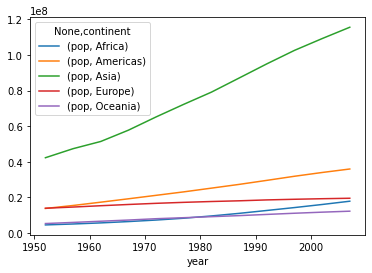

In [12]:
# 7)
df = gp.groupby(['continent','year']).mean('pop').unstack('continent')[['pop']]
df.plot()

## Question 3

On peut en conclure que :

* La population de l'Océanie et l'Europe a peu augmenté
* La population d'Afrique et d'Amérique augmente légèrement comparé à l'Asie
* La population d'Asie a beaucoup augmenté

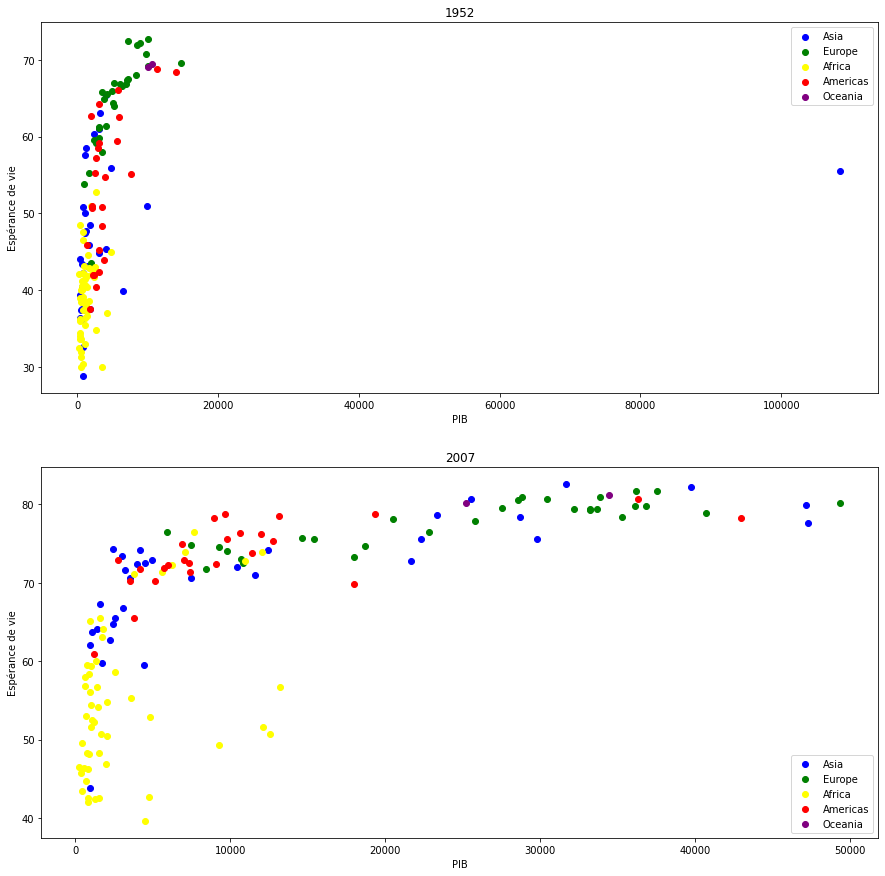

In [3]:
# 8)
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa':'yellow', 'Oceania':'purple'}
years = {1952, 2007}

fig, axs = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

for continent in gp.continent.unique():
    for index, year in enumerate(years):
        dataYear = gp[gp.year.eq(year)]
        data = dataYear[dataYear.continent.eq(continent)]
        axs[index].scatter(data.gdpPercap, data.lifeExp, c=colors[continent], label=continent)
        axs[index].set_xlabel('PIB')
        axs[index].set_ylabel('Espérance de vie')
        axs[index].set_title(year) 
        
axs[0].legend()
axs[1].legend()

## Question 4



### 1952

* Les PIB des pays étaient assez proche les uns des autres par rapport à leur        continent
* Le PIB max ne dépasse pas les 20'000\$
* Plus le PIB est élevé plus l'espérance de vie l'est aussi. C'est notamment le cas de l'afrique

### 2007

* Les pays qui avaient une bonne espérance de vie en 1952 ont un PIB qui a connu une grande croissance
* Le PIB max peut monter jusqu'à 50'000$ pour certains pays

### Conclusion

Pour conclure, nous pouvons aussi constater que le PIB et l'espérence de vie des pays d'Afrique n'a pas beaucoup augmenté par rapport aux autres continents.

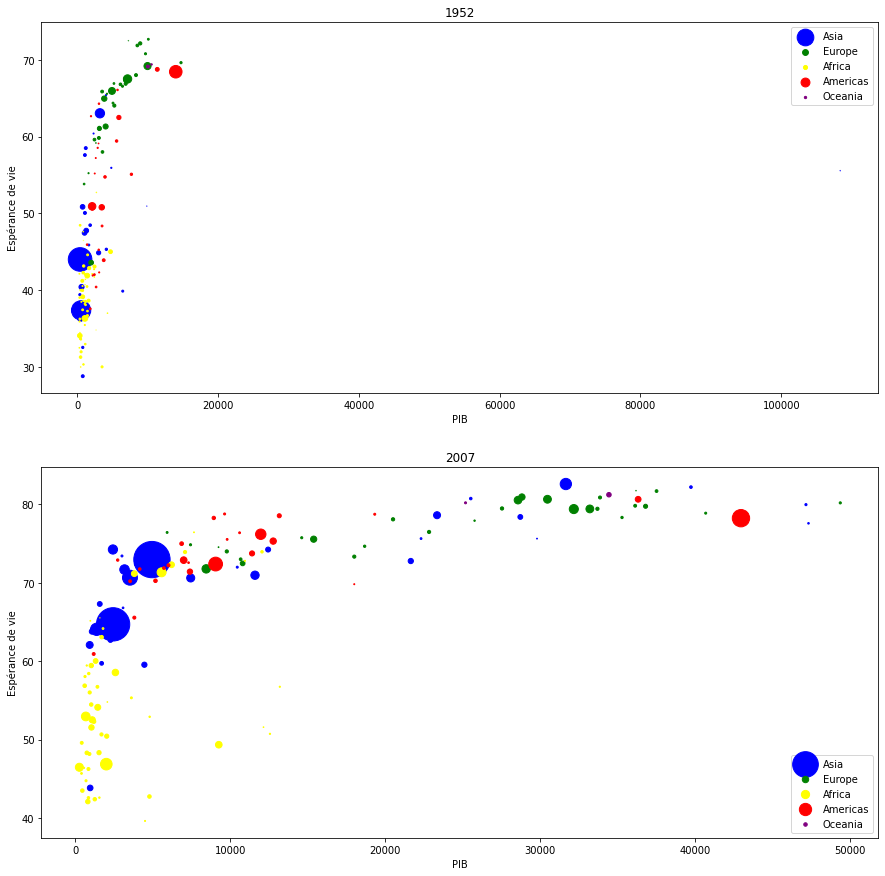

In [4]:
# 9)
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa':'yellow', 'Oceania':'purple'}
years = {1952, 2007}

fig, axs = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

for continent in gp.continent.unique():
    for index, year in enumerate(years):
        dataYear = gp[gp.year.eq(year)]
        data = dataYear[dataYear.continent.eq(continent)]
        axs[index].scatter(data.gdpPercap, data.lifeExp, s=data[['pop']]/1e6, c=colors[continent], label=continent, facecolors='none')
        axs[index].set_xlabel('PIB')
        axs[index].set_ylabel('Espérance de vie')
        axs[index].set_title(year) 
        
axs[0].legend()
axs[1].legend()

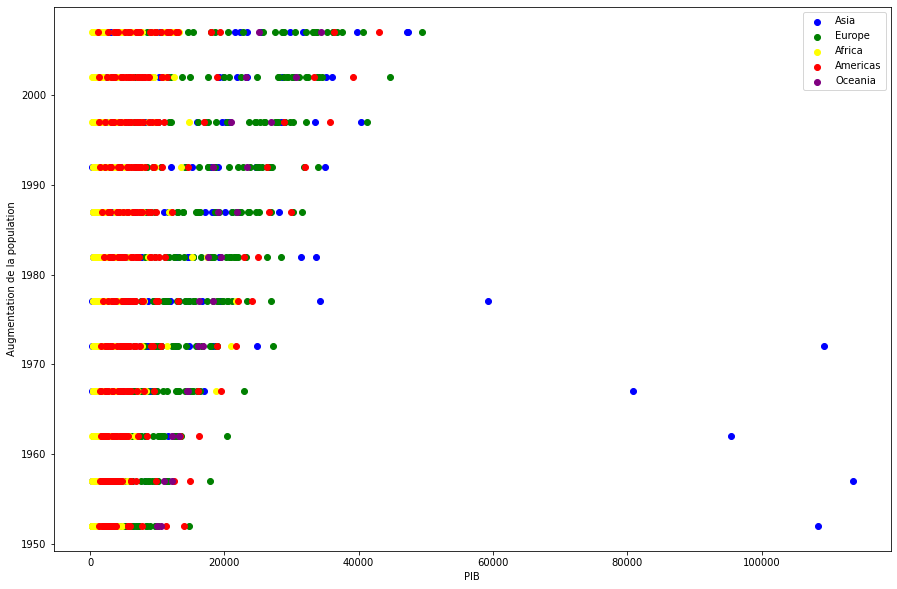

In [5]:
# 10)
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa':'yellow', 'Oceania':'purple'}

fig, axs = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)

for continent in gp.continent.unique():
    data = gp[gp.continent.eq(continent)]
    axs.scatter(data[['gdpPercap']], data[['year']], c=colors[continent], label=continent)

axs.set_xlabel('PIB')
axs.set_ylabel('Augmentation de la population') 
axs.legend()

## Question 10

* Premièrement nous obersevons que l'ensemble des données contient quelques valeurs paraistes
* De manière générale, le PIB des pays de même continent est assez proche. D'ou les groupes de couleur sur le graphe
* Le PIB des pays d'Amérique n'a pas beaucoup augmenté depuis 1952